## UNSUPERVISED LEARNING MODELS

# Import the Librairies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Import the data

In [2]:
data = pd.read_csv(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\churn_encoded.csv')
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
0,724,0,0,33,3,77299.370000,1,0,0,174433.518000,0
1,801,0,0,32,4,75170.540000,1,1,1,37898.500000,0
2,616,0,0,36,5,0.000000,1,0,0,139714.081429,0
3,570,1,0,36,5,142111.666667,2,1,1,110629.520000,0
4,632,0,0,36,6,0.000000,1,0,0,74353.966154,0


In [3]:
data.shape

(4072, 11)

In [4]:
data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Target               int64
dtype: object

# Goal: Cluster different customers of the bank

#### We will use the StandardScaler from sklearn.preprocessing and scale our data. After scaling the data, we will assign the transformed data to a new variable customers_scale.

In [5]:
customers_scale = StandardScaler().fit_transform(data)

In [6]:
customers_scale =pd.DataFrame(customers_scale, columns=data.columns)

In [7]:
customers_scale.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
0,0.873430,-0.919066,-0.757242,-0.864981,-0.724380,-0.434878,-0.476924,-1.115135,-0.678635,1.279125,-0.999509
1,1.774153,-0.919066,-0.757242,-0.971772,-0.327918,-0.474502,-0.476924,0.896752,1.473547,-1.083625,-0.999509
2,-0.389923,-0.919066,-0.757242,-0.544606,0.068543,-1.873634,-0.476924,-1.115135,-0.678635,0.678303,-0.999509
3,-0.928017,0.504997,-0.757242,-0.544606,0.068543,0.771459,1.087972,0.896752,1.473547,0.174992,-0.999509
4,-0.202759,-0.919066,-0.757242,-0.544606,0.465005,-1.873634,-0.476924,-1.115135,-0.678635,-0.452760,-0.999509


In [8]:
customers_scale.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Target'],
      dtype='object')

In [9]:
customers_scale.shape

(4072, 11)

# KMeans

#### We define X and y:

In [11]:
y = customers_scale['Target']
X = customers_scale.drop(columns = 'Target')


In [12]:
X


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.873430,-0.919066,-0.757242,-0.864981,-0.724380,-0.434878,-0.476924,-1.115135,-0.678635,1.279125
1,1.774153,-0.919066,-0.757242,-0.971772,-0.327918,-0.474502,-0.476924,0.896752,1.473547,-1.083625
2,-0.389923,-0.919066,-0.757242,-0.544606,0.068543,-1.873634,-0.476924,-1.115135,-0.678635,0.678303
3,-0.928017,0.504997,-0.757242,-0.544606,0.068543,0.771459,1.087972,0.896752,1.473547,0.174992
4,-0.202759,-0.919066,-0.757242,-0.544606,0.465005,-1.873634,-0.476924,-1.115135,-0.678635,-0.452760
...,...,...,...,...,...,...,...,...,...,...
4067,-1.770252,0.504997,1.320581,0.096144,-0.724380,0.956247,-0.476924,0.896752,1.473547,-0.814588
4068,0.066288,0.504997,-0.757242,0.523310,0.861467,0.679018,-0.476924,0.896752,-0.678635,0.253157
4069,-0.612179,-0.919066,-0.757242,1.270852,-0.327918,-0.228614,-0.476924,0.896752,-0.678635,-0.538753
4070,0.697964,-0.919066,-0.757242,-0.544606,0.861467,-1.873634,-0.476924,-1.115135,1.473547,-1.011167


#### Elbow Method

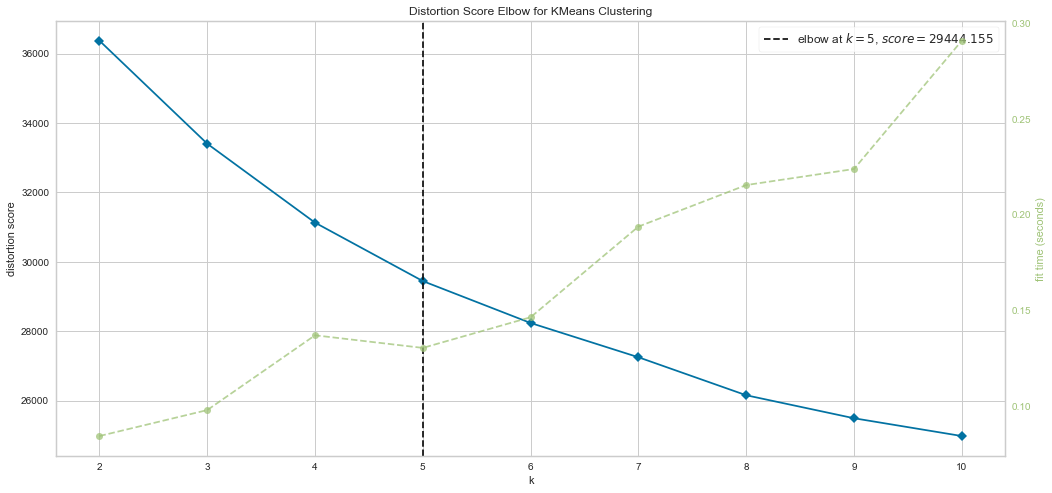

<Figure size 576x396 with 0 Axes>

In [13]:
f, ax = plt.subplots(figsize=(17, 8))
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show()
plt.show()

plt.savefig(r'C:\Users\Ingrid\Desktop\DAFT Nov 21\Projects\Final project\Elbow_method.png')

Comment: According to the Elbow method, the optimum number of clusters is 5.

In [14]:
# We implement the model with the optimum k = 5
kmeans = KMeans(n_clusters=5)

# We fit our model
kmeans.fit(X)

# Our prediction
y_kmeans = kmeans.predict(X)


Silhouette score for KMeans is:  0.10521524673759539


In [15]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [16]:
X['label']=kmeans.labels_

In [17]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,label
0,0.873430,-0.919066,-0.757242,-0.864981,-0.724380,-0.434878,-0.476924,-1.115135,-0.678635,1.279125,1
1,1.774153,-0.919066,-0.757242,-0.971772,-0.327918,-0.474502,-0.476924,0.896752,1.473547,-1.083625,4
2,-0.389923,-0.919066,-0.757242,-0.544606,0.068543,-1.873634,-0.476924,-1.115135,-0.678635,0.678303,1
3,-0.928017,0.504997,-0.757242,-0.544606,0.068543,0.771459,1.087972,0.896752,1.473547,0.174992,4
4,-0.202759,-0.919066,-0.757242,-0.544606,0.465005,-1.873634,-0.476924,-1.115135,-0.678635,-0.452760,1


In [18]:
# Count the values in labels
X['label'].value_counts()

4    1167
1     967
0     862
3     795
2     281
Name: label, dtype: int64

In [23]:
# we need to import a module for the Silhouette score: from sklearn.metrics import silhouette_score
print('Silhouette score for KMeans is: ', silhouette_score(X, y_kmeans))

Silhouette score for KMeans is:  0.19090732900225457


Comment: The silhouette score is very low so we can try a new model like DBSCAN.

# DBSCAN

In [28]:
dbscan_cluster = DBSCAN(eps=0.5)
dbscan_cluster.fit(customers_scale)

DBSCAN()

In [29]:
X['labels_DBSCAN'] = dbscan_cluster.labels_

In [30]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,label,labels_DBSCAN
0,0.873430,-0.919066,-0.757242,-0.864981,-0.724380,-0.434878,-0.476924,-1.115135,-0.678635,1.279125,1,-1
1,1.774153,-0.919066,-0.757242,-0.971772,-0.327918,-0.474502,-0.476924,0.896752,1.473547,-1.083625,4,-1
2,-0.389923,-0.919066,-0.757242,-0.544606,0.068543,-1.873634,-0.476924,-1.115135,-0.678635,0.678303,1,0
3,-0.928017,0.504997,-0.757242,-0.544606,0.068543,0.771459,1.087972,0.896752,1.473547,0.174992,4,-1
4,-0.202759,-0.919066,-0.757242,-0.544606,0.465005,-1.873634,-0.476924,-1.115135,-0.678635,-0.452760,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4067,-1.770252,0.504997,1.320581,0.096144,-0.724380,0.956247,-0.476924,0.896752,1.473547,-0.814588,4,-1
4068,0.066288,0.504997,-0.757242,0.523310,0.861467,0.679018,-0.476924,0.896752,-0.678635,0.253157,3,-1
4069,-0.612179,-0.919066,-0.757242,1.270852,-0.327918,-0.228614,-0.476924,0.896752,-0.678635,-0.538753,3,-1
4070,0.697964,-0.919066,-0.757242,-0.544606,0.861467,-1.873634,-0.476924,-1.115135,1.473547,-1.011167,4,-1


In [32]:
# Count the values in labels_DBSCAN
X['labels_DBSCAN'].value_counts()

-1     3879
 0      125
 2       17
 4        8
 3        7
 6        6
 7        6
 8        5
 10       5
 1        5
 9        5
 5        4
Name: labels_DBSCAN, dtype: int64

In [64]:
db1 = DBSCAN(eps=0.4, min_samples=4)
db1.fit(X)
X['labels_db1'] = db1.labels_
print(X['labels_db1'].value_counts())



-1    3971
 0      93
 2       4
 1       4
Name: labels_db1, dtype: int64


In [65]:
db1_silhouette = silhouette_score(X, db1.labels_)
db1_silhouette

-0.02239358928176987

In [69]:
db2 = DBSCAN(eps=0.6, min_samples=5)
db2.fit(X)
X['labels_db2'] = db1.labels_
print(X['labels_db2'].value_counts())

db2_silhouette = silhouette_score(X, db2.labels_)
db2_silhouette

-1    3971
 0      93
 2       4
 1       4
Name: labels_db2, dtype: int64


-0.3023986377202901

In [70]:
db3 = DBSCAN(eps=0.6, min_samples=5)
db3.fit(X)
X['labels_db3'] = db3.labels_
print(X['labels_db3'].value_counts())

db3_silhouette = silhouette_score(X, db3.labels_)
db3_silhouette

-1     3778
 0       93
 7       20
 6       14
 4       13
 8       12
 3       12
 12      11
 18      10
 16       8
 5        8
 9        7
 2        6
 11       6
 24       6
 19       6
 20       6
 14       6
 15       5
 21       5
 23       5
 17       5
 1        5
 13       5
 26       5
 22       5
 10       5
 25       5
Name: labels_db3, dtype: int64


0.03476227774795967

In [75]:
db4 = DBSCAN(eps=0.6, min_samples=4)
db4.fit(X)
X['labels_db4'] = db4.labels_
print(X['labels_db4'].value_counts())

db4_silhouette = silhouette_score(X, db4.labels_)
db4_silhouette

-1     3714
 0       93
 9       11
 30       9
 14       9
 25       8
 12       8
 7        8
 23       8
 11       6
 5        6
 40       6
 36       6
 32       6
 4        6
 10       6
 24       6
 22       6
 18       6
 47       6
 50       5
 16       5
 31       5
 33       5
 2        5
 48       5
 35       5
 42       5
 17       5
 46       5
 29       4
 27       4
 41       4
 43       4
 45       4
 39       4
 37       4
 1        4
 21       4
 19       4
 15       4
 13       4
 3        4
 6        4
 44       4
 38       4
 34       4
 28       4
 26       4
 20       4
 8        4
 49       4
Name: labels_db4, dtype: int64


0.09801409092084035

In [76]:
db5 = DBSCAN(eps=0.6, min_samples=3)
db5.fit(X)
X['labels_db4'] = db5.labels_
print(X['labels_db4'].value_counts())

db5_silhouette = silhouette_score(X, db5.labels_)
db5_silhouette

-1      3536
 1        93
 15       11
 23        9
 54        9
        ... 
 102       3
 104       3
 21        3
 33        3
 105       3
Name: labels_db4, Length: 107, dtype: int64


0.17451303887693748

In [78]:
db6 = DBSCAN(eps=0.3, min_samples=3)
db6.fit(X)
X['labels_db4'] = db6.labels_
print(X['labels_db4'].value_counts())

db6_silhouette = silhouette_score(X, db6.labels_)
db6_silhouette

-1     4021
 2        4
 1        4
 7        4
 9        4
 11       4
 13       4
 0        3
 4        3
 6        3
 8        3
 10       3
 12       3
 14       3
 3        3
 5        3
Name: labels_db4, dtype: int64


-0.05215899253183441

In [81]:
db7 = DBSCAN(eps=0.5, min_samples=10)
db7.fit(X)
X['labels_db4'] = db7.labels_
print(X['labels_db4'].value_counts())

db7_silhouette = silhouette_score(X, db7.labels_)
db7_silhouette

-1    3984
 0      49
 1      39
Name: labels_db4, dtype: int64


-0.044184285875117246

#### Conclusion

KMeans and DBSCAN have really poor silhouette scores. We can say that supervised models learning is better to resolve this case.